# 1. Install and Import Dependencies

In [ ]:
#!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:   
    while cap.isOpened():

        #Read Feed
        ret, frame = cap.read()

        #Make Detections
        image, results = mediapipe_detection(frame,holistic)
        
        #Draw Landmarks
        draw_styled_landmarks(image, results)
        
        #Show to Screen
        cv2.imshow('OpenCV Feed',cv2.resize(image, (1080, 720)))
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# 3. Extract Keypoint Values

In [7]:
results.left_hand_landmarks

In [8]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [9]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [10]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
rh

array([ 8.22953880e-02,  1.00628150e+00,  4.11321906e-07,  1.50831610e-01,
        9.56281483e-01, -2.92737521e-02,  1.99763656e-01,  8.67351592e-01,
       -3.95843424e-02,  2.29410112e-01,  7.83363283e-01, -4.89227660e-02,
        2.61706680e-01,  7.21816003e-01, -5.78055121e-02,  1.51332855e-01,
        7.38551676e-01, -8.40585213e-03,  1.73910528e-01,  6.52519941e-01,
       -2.77394950e-02,  1.88653678e-01,  6.02161288e-01, -4.65787761e-02,
        2.02929869e-01,  5.57977676e-01, -6.12486340e-02,  1.02411553e-01,
        7.26158023e-01, -1.16333449e-02,  1.09321304e-01,  6.23101115e-01,
       -2.90941261e-02,  1.21221915e-01,  5.63137054e-01, -4.71264161e-02,
        1.34789348e-01,  5.10596097e-01, -6.04175590e-02,  5.43620884e-02,
        7.42899239e-01, -2.06455942e-02,  4.86164764e-02,  6.40881538e-01,
       -4.39788438e-02,  5.27944863e-02,  5.72933555e-01, -6.24937490e-02,
        6.22524247e-02,  5.11918485e-01, -7.47098029e-02,  7.06238300e-03,
        7.84051895e-01, -

In [13]:
pose.shape

(132,)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)
result_test

array([ 0.53052241,  0.69036847, -1.11916983, ..., -0.04234739,
        0.602301  , -0.07952175])

# 4. Setup Folders For Collection

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [17]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoints Values for Trainning and Testing

In [18]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [19]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}


In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
np.array(sequences).shape

(90, 30, 1662)

In [24]:
np.array(labels).shape

(90,)

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(90, 30, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [30]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [48]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [49]:
res = [.7, 0.2, 0.1]

In [50]:
actions[np.argmax(res)]

'hello'

In [51]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [37]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
3/3 [==============================] - 3s 96ms/step - loss: 5.9483 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.8918 - categorical_accuracy: 0.3294
Epoch 3/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.9173 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.5775 - categorical_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1253 - categorical_accuracy: 0.4000
Epoch 6/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0419 - categorical_accuracy: 0.4235
Epoch 7/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0721 - categorical_accuracy: 0.5176
Epoch 8/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0794 - categorical_accuracy: 0.5059
Epoch 9/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0602 - categorical_accuracy: 0.5059


3/3 [==============================] - 0s 53ms/step - loss: 0.2789 - categorical_accuracy: 0.9412
Epoch 75/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.1821 - categorical_accuracy: 0.9294
Epoch 76/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.1371 - categorical_accuracy: 0.9529
Epoch 77/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1980 - categorical_accuracy: 0.9647
Epoch 78/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0733 - categorical_accuracy: 0.9765
Epoch 79/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0404 - categorical_accuracy: 1.0000
Epoch 80/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0370 - categorical_accuracy: 1.0000
Epoch 81/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0463 - categorical_accuracy: 0.9765
Epoch 82/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0252 - categorical_accuracy: 0.9882
Epoch 

3/3 [==============================] - 0s 53ms/step - loss: 3.2387e-05 - categorical_accuracy: 1.0000
Epoch 146/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.1913e-05 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.1467e-05 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 51ms/step - loss: 3.1058e-05 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.0523e-05 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.0112e-05 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.9643e-05 - categorical_accuracy: 1.0000
Epoch 152/2000
3/3 [==============================] - 0s 50ms/step - loss: 2.9193e-05 - categorical_accuracy: 1.0000
Epoch 153/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.88

3/3 [==============================] - 0s 51ms/step - loss: 1.2999e-05 - categorical_accuracy: 1.0000
Epoch 216/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.2850e-05 - categorical_accuracy: 1.0000
Epoch 217/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.2696e-05 - categorical_accuracy: 1.0000
Epoch 218/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.2564e-05 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.2397e-05 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.2257e-05 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.2129e-05 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.1968e-05 - categorical_accuracy: 1.0000
Epoch 223/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.18

3/3 [==============================] - 0s 51ms/step - loss: 6.1356e-06 - categorical_accuracy: 1.0000
Epoch 286/2000
3/3 [==============================] - 0s 62ms/step - loss: 6.0795e-06 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 0s 53ms/step - loss: 6.0291e-06 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.9659e-06 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 53ms/step - loss: 5.9113e-06 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 57ms/step - loss: 5.8636e-06 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.8033e-06 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 61ms/step - loss: 5.7556e-06 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.70

3/3 [==============================] - 0s 51ms/step - loss: 3.6239e-06 - categorical_accuracy: 1.0000
Epoch 356/2000
3/3 [==============================] - 0s 51ms/step - loss: 3.5987e-06 - categorical_accuracy: 1.0000
Epoch 357/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.5790e-06 - categorical_accuracy: 1.0000
Epoch 358/2000
3/3 [==============================] - 0s 60ms/step - loss: 3.5510e-06 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.5342e-06 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.4991e-06 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.4823e-06 - categorical_accuracy: 1.0000
Epoch 362/2000
3/3 [==============================] - 0s 63ms/step - loss: 3.4556e-06 - categorical_accuracy: 1.0000
Epoch 363/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.42

3/3 [==============================] - 0s 52ms/step - loss: 2.3463e-06 - categorical_accuracy: 1.0000
Epoch 426/2000
3/3 [==============================] - 0s 51ms/step - loss: 2.3309e-06 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.3182e-06 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.3042e-06 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.2944e-06 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.2874e-06 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.2678e-06 - categorical_accuracy: 1.0000
Epoch 432/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.2551e-06 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 51ms/step - loss: 2.23

3/3 [==============================] - 0s 55ms/step - loss: 1.6086e-06 - categorical_accuracy: 1.0000
Epoch 496/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.6058e-06 - categorical_accuracy: 1.0000
Epoch 497/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.5974e-06 - categorical_accuracy: 1.0000
Epoch 498/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.5918e-06 - categorical_accuracy: 1.0000
Epoch 499/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.5834e-06 - categorical_accuracy: 1.0000
Epoch 500/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.5806e-06 - categorical_accuracy: 1.0000
Epoch 501/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.5736e-06 - categorical_accuracy: 1.0000
Epoch 502/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.5581e-06 - categorical_accuracy: 1.0000
Epoch 503/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.55

3/3 [==============================] - 0s 52ms/step - loss: 1.1781e-06 - categorical_accuracy: 1.0000
Epoch 566/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1739e-06 - categorical_accuracy: 1.0000
Epoch 567/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.1682e-06 - categorical_accuracy: 1.0000
Epoch 568/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.1654e-06 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1612e-06 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1584e-06 - categorical_accuracy: 1.0000
Epoch 571/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.1542e-06 - categorical_accuracy: 1.0000
Epoch 572/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1514e-06 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.14

3/3 [==============================] - 0s 54ms/step - loss: 9.1580e-07 - categorical_accuracy: 1.0000
Epoch 636/2000
3/3 [==============================] - 0s 52ms/step - loss: 9.1160e-07 - categorical_accuracy: 1.0000
Epoch 637/2000
3/3 [==============================] - 0s 53ms/step - loss: 9.0879e-07 - categorical_accuracy: 1.0000
Epoch 638/2000
3/3 [==============================] - 0s 55ms/step - loss: 9.0458e-07 - categorical_accuracy: 1.0000
Epoch 639/2000
3/3 [==============================] - 0s 54ms/step - loss: 9.0038e-07 - categorical_accuracy: 1.0000
Epoch 640/2000
3/3 [==============================] - 0s 52ms/step - loss: 9.0038e-07 - categorical_accuracy: 1.0000
Epoch 641/2000
3/3 [==============================] - 0s 51ms/step - loss: 8.9617e-07 - categorical_accuracy: 1.0000
Epoch 642/2000
3/3 [==============================] - 0s 52ms/step - loss: 8.9336e-07 - categorical_accuracy: 1.0000
Epoch 643/2000
3/3 [==============================] - 0s 52ms/step - loss: 8.90

3/3 [==============================] - 0s 53ms/step - loss: 7.2928e-07 - categorical_accuracy: 1.0000
Epoch 706/2000
3/3 [==============================] - 0s 53ms/step - loss: 7.2928e-07 - categorical_accuracy: 1.0000
Epoch 707/2000
3/3 [==============================] - 0s 52ms/step - loss: 7.2647e-07 - categorical_accuracy: 1.0000
Epoch 708/2000
3/3 [==============================] - 0s 52ms/step - loss: 7.2086e-07 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 56ms/step - loss: 7.2086e-07 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 55ms/step - loss: 7.1946e-07 - categorical_accuracy: 1.0000
Epoch 711/2000
3/3 [==============================] - 0s 53ms/step - loss: 7.1806e-07 - categorical_accuracy: 1.0000
Epoch 712/2000
3/3 [==============================] - 0s 52ms/step - loss: 7.1525e-07 - categorical_accuracy: 1.0000
Epoch 713/2000
3/3 [==============================] - 0s 51ms/step - loss: 7.13

3/3 [==============================] - 0s 52ms/step - loss: 6.0165e-07 - categorical_accuracy: 1.0000
Epoch 776/2000
3/3 [==============================] - 0s 55ms/step - loss: 5.9745e-07 - categorical_accuracy: 1.0000
Epoch 777/2000
3/3 [==============================] - 0s 55ms/step - loss: 5.9604e-07 - categorical_accuracy: 1.0000
Epoch 778/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.9464e-07 - categorical_accuracy: 1.0000
Epoch 779/2000
3/3 [==============================] - 0s 51ms/step - loss: 5.9324e-07 - categorical_accuracy: 1.0000
Epoch 780/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.9184e-07 - categorical_accuracy: 1.0000
Epoch 781/2000
3/3 [==============================] - 0s 51ms/step - loss: 5.9184e-07 - categorical_accuracy: 1.0000
Epoch 782/2000
3/3 [==============================] - 0s 55ms/step - loss: 5.9184e-07 - categorical_accuracy: 1.0000
Epoch 783/2000
3/3 [==============================] - 0s 55ms/step - loss: 5.89

3/3 [==============================] - 0s 59ms/step - loss: 5.0068e-07 - categorical_accuracy: 1.0000
Epoch 846/2000
3/3 [==============================] - 0s 60ms/step - loss: 4.9787e-07 - categorical_accuracy: 1.0000
Epoch 847/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.9647e-07 - categorical_accuracy: 1.0000
Epoch 848/2000
3/3 [==============================] - 0s 63ms/step - loss: 4.9647e-07 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 54ms/step - loss: 4.9507e-07 - categorical_accuracy: 1.0000
Epoch 850/2000
3/3 [==============================] - 0s 53ms/step - loss: 4.9507e-07 - categorical_accuracy: 1.0000
Epoch 851/2000
3/3 [==============================] - 0s 53ms/step - loss: 4.9507e-07 - categorical_accuracy: 1.0000
Epoch 852/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.9367e-07 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.88

3/3 [==============================] - 0s 53ms/step - loss: 4.1092e-07 - categorical_accuracy: 1.0000
Epoch 916/2000
3/3 [==============================] - 0s 52ms/step - loss: 4.1092e-07 - categorical_accuracy: 1.0000
Epoch 917/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.1092e-07 - categorical_accuracy: 1.0000
Epoch 918/2000
3/3 [==============================] - 0s 54ms/step - loss: 4.1092e-07 - categorical_accuracy: 1.0000
Epoch 919/2000
3/3 [==============================] - 0s 53ms/step - loss: 4.1092e-07 - categorical_accuracy: 1.0000
Epoch 920/2000
3/3 [==============================] - 0s 53ms/step - loss: 4.0812e-07 - categorical_accuracy: 1.0000
Epoch 921/2000
3/3 [==============================] - 0s 52ms/step - loss: 4.0812e-07 - categorical_accuracy: 1.0000
Epoch 922/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.0812e-07 - categorical_accuracy: 1.0000
Epoch 923/2000
3/3 [==============================] - 0s 54ms/step - loss: 4.05

3/3 [==============================] - 0s 54ms/step - loss: 3.5482e-07 - categorical_accuracy: 1.0000
Epoch 986/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.5202e-07 - categorical_accuracy: 1.0000
Epoch 987/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.5202e-07 - categorical_accuracy: 1.0000
Epoch 988/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.5202e-07 - categorical_accuracy: 1.0000
Epoch 989/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.5202e-07 - categorical_accuracy: 1.0000
Epoch 990/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.5202e-07 - categorical_accuracy: 1.0000
Epoch 991/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.5061e-07 - categorical_accuracy: 1.0000
Epoch 992/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.5061e-07 - categorical_accuracy: 1.0000
Epoch 993/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.47

3/3 [==============================] - 0s 55ms/step - loss: 2.9872e-07 - categorical_accuracy: 1.0000
Epoch 1055/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.9592e-07 - categorical_accuracy: 1.0000
Epoch 1056/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.9592e-07 - categorical_accuracy: 1.0000
Epoch 1057/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.9592e-07 - categorical_accuracy: 1.0000
Epoch 1058/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.9592e-07 - categorical_accuracy: 1.0000
Epoch 1059/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.9592e-07 - categorical_accuracy: 1.0000
Epoch 1060/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.9452e-07 - categorical_accuracy: 1.0000
Epoch 1061/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.9311e-07 - categorical_accuracy: 1.0000
Epoch 1062/2000
3/3 [==============================] - 0s 52ms/step - lo

3/3 [==============================] - 0s 60ms/step - loss: 2.5525e-07 - categorical_accuracy: 1.0000
Epoch 1124/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.5665e-07 - categorical_accuracy: 1.0000
Epoch 1125/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.5665e-07 - categorical_accuracy: 1.0000
Epoch 1126/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.5385e-07 - categorical_accuracy: 1.0000
Epoch 1127/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.5385e-07 - categorical_accuracy: 1.0000
Epoch 1128/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.5385e-07 - categorical_accuracy: 1.0000
Epoch 1129/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.5385e-07 - categorical_accuracy: 1.0000
Epoch 1130/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.5244e-07 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 53ms/step - lo

3/3 [==============================] - 0s 59ms/step - loss: 2.2019e-07 - categorical_accuracy: 1.0000
Epoch 1193/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.2019e-07 - categorical_accuracy: 1.0000
Epoch 1194/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.1878e-07 - categorical_accuracy: 1.0000
Epoch 1195/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.1878e-07 - categorical_accuracy: 1.0000
Epoch 1196/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.1738e-07 - categorical_accuracy: 1.0000
Epoch 1197/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.1738e-07 - categorical_accuracy: 1.0000
Epoch 1198/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.1738e-07 - categorical_accuracy: 1.0000
Epoch 1199/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.1738e-07 - categorical_accuracy: 1.0000
Epoch 1200/2000
3/3 [==============================] - 0s 53ms/step - lo

3/3 [==============================] - 0s 52ms/step - loss: 1.8512e-07 - categorical_accuracy: 1.0000
Epoch 1262/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.8512e-07 - categorical_accuracy: 1.0000
Epoch 1263/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.8372e-07 - categorical_accuracy: 1.0000
Epoch 1264/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.8372e-07 - categorical_accuracy: 1.0000
Epoch 1265/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.8372e-07 - categorical_accuracy: 1.0000
Epoch 1266/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.8372e-07 - categorical_accuracy: 1.0000
Epoch 1267/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.8372e-07 - categorical_accuracy: 1.0000
Epoch 1268/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.8372e-07 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 55ms/step - lo

3/3 [==============================] - 0s 61ms/step - loss: 1.5848e-07 - categorical_accuracy: 1.0000
Epoch 1331/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.5848e-07 - categorical_accuracy: 1.0000
Epoch 1332/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.5708e-07 - categorical_accuracy: 1.0000
Epoch 1333/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.5708e-07 - categorical_accuracy: 1.0000
Epoch 1334/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.5708e-07 - categorical_accuracy: 1.0000
Epoch 1335/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.5708e-07 - categorical_accuracy: 1.0000
Epoch 1336/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.5708e-07 - categorical_accuracy: 1.0000
Epoch 1337/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.5567e-07 - categorical_accuracy: 1.0000
Epoch 1338/2000
3/3 [==============================] - 0s 63ms/step - lo

3/3 [==============================] - 0s 59ms/step - loss: 1.3464e-07 - categorical_accuracy: 1.0000
Epoch 1400/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.3323e-07 - categorical_accuracy: 1.0000
Epoch 1401/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.3323e-07 - categorical_accuracy: 1.0000
Epoch 1402/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.3323e-07 - categorical_accuracy: 1.0000
Epoch 1403/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.3323e-07 - categorical_accuracy: 1.0000
Epoch 1404/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.3323e-07 - categorical_accuracy: 1.0000
Epoch 1405/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.3323e-07 - categorical_accuracy: 1.0000
Epoch 1406/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.3043e-07 - categorical_accuracy: 1.0000
Epoch 1407/2000
3/3 [==============================] - 0s 53ms/step - lo

3/3 [==============================] - 0s 58ms/step - loss: 1.1220e-07 - categorical_accuracy: 1.0000
Epoch 1469/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1220e-07 - categorical_accuracy: 1.0000
Epoch 1470/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1220e-07 - categorical_accuracy: 1.0000
Epoch 1471/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1220e-07 - categorical_accuracy: 1.0000
Epoch 1472/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1079e-07 - categorical_accuracy: 1.0000
Epoch 1473/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0939e-07 - categorical_accuracy: 1.0000
Epoch 1474/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0939e-07 - categorical_accuracy: 1.0000
Epoch 1475/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0939e-07 - categorical_accuracy: 1.0000
Epoch 1476/2000
3/3 [==============================] - 0s 58ms/step - lo

3/3 [==============================] - 0s 56ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 1538/2000
3/3 [==============================] - 0s 59ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 1539/2000
3/3 [==============================] - 0s 62ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 1540/2000
3/3 [==============================] - 0s 61ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 1541/2000
3/3 [==============================] - 0s 58ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 1542/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 1543/2000
3/3 [==============================] - 0s 57ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 1544/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.6953e-08 - categorical_accuracy: 1.0000
Epoch 1545/2000
3/3 [==============================] - 0s 63ms/step - lo

3/3 [==============================] - 0s 56ms/step - loss: 7.5733e-08 - categorical_accuracy: 1.0000
Epoch 1607/2000
3/3 [==============================] - 0s 53ms/step - loss: 7.5733e-08 - categorical_accuracy: 1.0000
Epoch 1608/2000
3/3 [==============================] - 0s 55ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 1609/2000
3/3 [==============================] - 0s 53ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 1610/2000
3/3 [==============================] - 0s 54ms/step - loss: 7.2928e-08 - categorical_accuracy: 1.0000
Epoch 1611/2000
3/3 [==============================] - 0s 53ms/step - loss: 7.2928e-08 - categorical_accuracy: 1.0000
Epoch 1612/2000
3/3 [==============================] - 0s 55ms/step - loss: 7.2928e-08 - categorical_accuracy: 1.0000
Epoch 1613/2000
3/3 [==============================] - 0s 53ms/step - loss: 7.1526e-08 - categorical_accuracy: 1.0000
Epoch 1614/2000
3/3 [==============================] - 0s 53ms/step - lo

3/3 [==============================] - 0s 53ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1676/2000
3/3 [==============================] - 0s 56ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1677/2000
3/3 [==============================] - 0s 54ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1678/2000
3/3 [==============================] - 0s 53ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1679/2000
3/3 [==============================] - 0s 53ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1680/2000
3/3 [==============================] - 0s 55ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1681/2000
3/3 [==============================] - 0s 53ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1682/2000
3/3 [==============================] - 0s 54ms/step - loss: 6.1708e-08 - categorical_accuracy: 1.0000
Epoch 1683/2000
3/3 [==============================] - 0s 53ms/step - lo

3/3 [==============================] - 0s 54ms/step - loss: 5.6098e-08 - categorical_accuracy: 1.0000
Epoch 1745/2000
3/3 [==============================] - 0s 54ms/step - loss: 5.6098e-08 - categorical_accuracy: 1.0000
Epoch 1746/2000
3/3 [==============================] - 0s 53ms/step - loss: 5.6098e-08 - categorical_accuracy: 1.0000
Epoch 1747/2000
3/3 [==============================] - 0s 53ms/step - loss: 5.7501e-08 - categorical_accuracy: 1.0000
Epoch 1748/2000
3/3 [==============================] - 0s 54ms/step - loss: 5.7501e-08 - categorical_accuracy: 1.0000
Epoch 1749/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.4696e-08 - categorical_accuracy: 1.0000
Epoch 1750/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.4696e-08 - categorical_accuracy: 1.0000
Epoch 1751/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.4696e-08 - categorical_accuracy: 1.0000
Epoch 1752/2000
3/3 [==============================] - 0s 54ms/step - lo

3/3 [==============================] - 0s 57ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1814/2000
3/3 [==============================] - 0s 57ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1815/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1816/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1817/2000
3/3 [==============================] - 0s 54ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1818/2000
3/3 [==============================] - 0s 53ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1819/2000
3/3 [==============================] - 0s 58ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1820/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1821/2000
3/3 [==============================] - 0s 53ms/step - lo

3/3 [==============================] - 0s 53ms/step - loss: 3.9269e-08 - categorical_accuracy: 1.0000
Epoch 1883/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.9269e-08 - categorical_accuracy: 1.0000
Epoch 1884/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.9269e-08 - categorical_accuracy: 1.0000
Epoch 1885/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.9269e-08 - categorical_accuracy: 1.0000
Epoch 1886/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.9269e-08 - categorical_accuracy: 1.0000
Epoch 1887/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.9269e-08 - categorical_accuracy: 1.0000
Epoch 1888/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.9269e-08 - categorical_accuracy: 1.0000
Epoch 1889/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.9269e-08 - categorical_accuracy: 1.0000
Epoch 1890/2000
3/3 [==============================] - 0s 56ms/step - lo

3/3 [==============================] - 0s 52ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1952/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.2257e-08 - categorical_accuracy: 1.0000
Epoch 1953/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.2257e-08 - categorical_accuracy: 1.0000
Epoch 1954/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.2257e-08 - categorical_accuracy: 1.0000
Epoch 1955/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1956/2000
3/3 [==============================] - 0s 55ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1957/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1958/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.0854e-08 - categorical_accuracy: 1.0000
Epoch 1959/2000
3/3 [==============================] - 0s 53ms/step - lo

In [38]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [40]:
res = model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [42]:
actions[np.argmax(res[4])]

'iloveyou'

In [44]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [45]:
model.save('action.h5')

In [46]:
del model

In [52]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [53]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [54]:
yhat = model.predict(X_test)


1/1 [==============================] - 0s 227ms/step


In [55]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [56]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [57]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [58]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

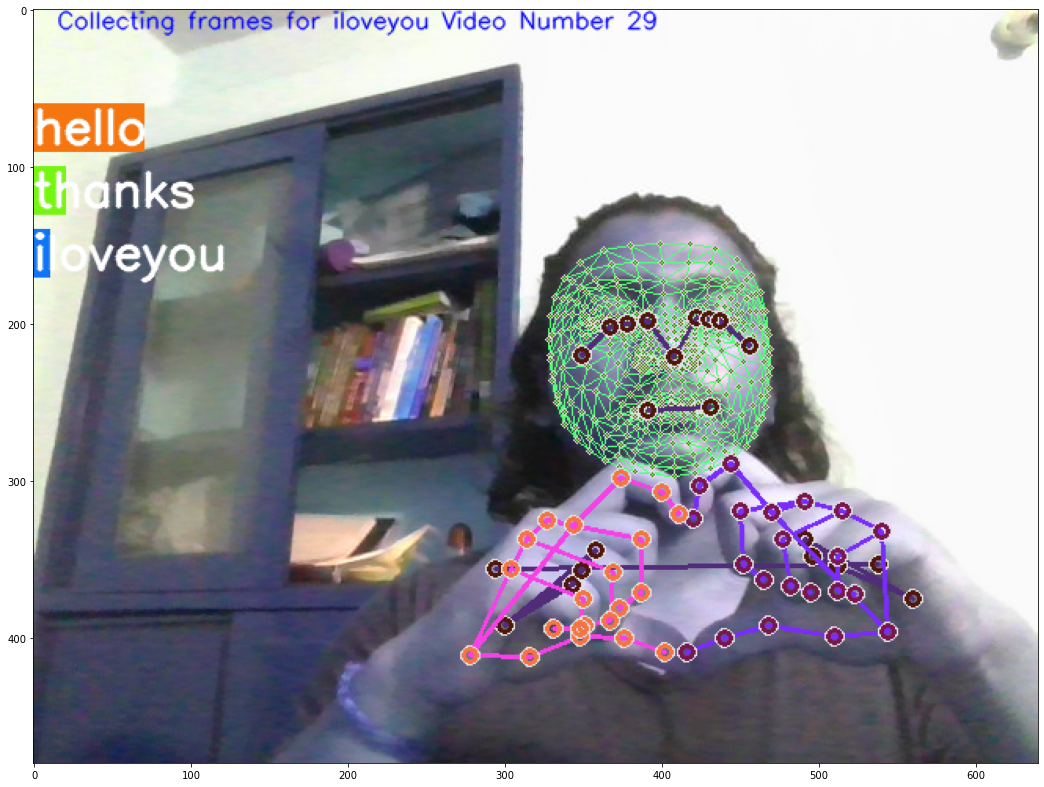

In [59]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [71]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', cv2.resize(image, (1080, 720)))

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.pyt

1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'media

1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'media

1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediap

1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'media

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.pyt

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 14ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
ilov

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'media

1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapip

1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'media

1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'media

1/1 [==============================] - 0s 13ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
thanks
<class 'media

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 13ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
hello


In [69]:
cap.release()
cv2.destroyAllWindows()

In [64]:
res[np.argmax(res)] > threshold

True

In [66]:
model.predict(np.expand_dims(X_test[0], axis=0))


1/1 [==============================] - 0s 17ms/step


array([[3.74955036e-08, 1.00000000e+00, 1.30091935e-11]], dtype=float32)